<a href="https://www.kaggle.com/code/azminetoushikwasi/coursera-eda-reviews-sentiment-analysis?scriptVersionId=103943135" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

<div style="padding:20px;color:white;margin:0;font-size:300%;text-align:center;display:fill;border-radius:5px;background-color:#282c5c;overflow:hidden;font-weight:500">Coursera 📉 EDA, Insights, Sentiment Analysis</div>

<div style="padding:20px;color:white;margin:0;font-size:220%;text-align:center;display:fill;border-radius:5px;background-color:#282f85;overflow:hidden;font-weight:500">Introduction</div>

# ⌛️ 1. Introduction

## 1.1. About Coursera
Coursera Inc. is a U.S.-based massive open online course provider founded in 2012 by Stanford University computer science professors Andrew Ng and Daphne Koller. Coursera works with universities and other organizations to offer online courses, certifications, and degrees in a variety of subjects.

- Stock price: COUR (NYSE) $15.51 +0.02 (+0.13%) - May 20, 10:12 AM EDT
- Founded: 2012
- Headquarters: California, United States
- Users: 92 million (2021)
- Employees: 1,138 (December 2021)
- Available in: Multilingual (40)
- Founders: Andrew Ng, Daphne Koller


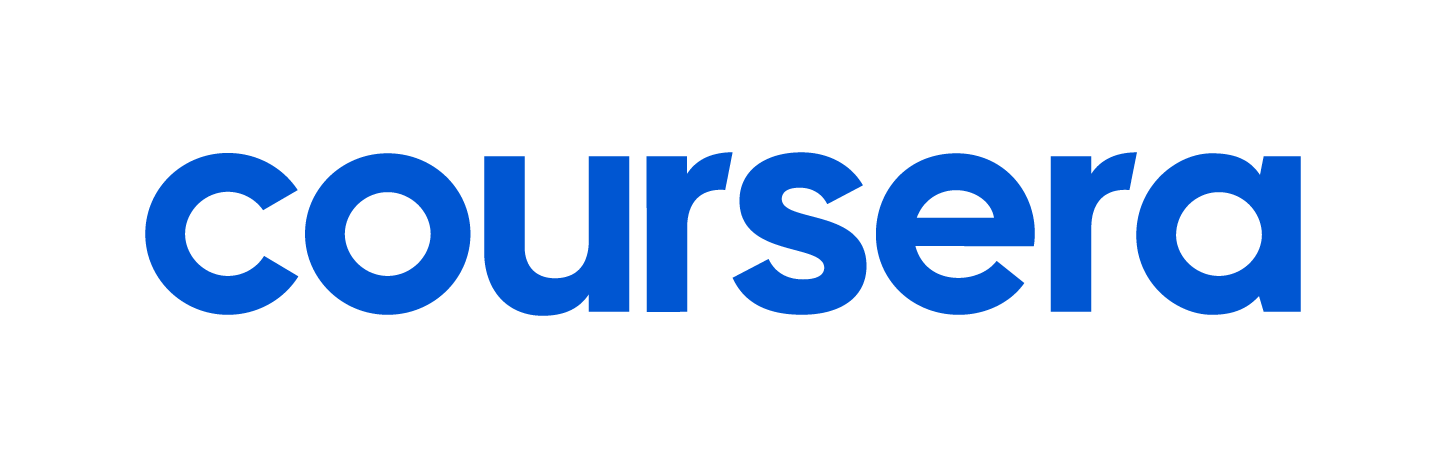

## 1.2. EDA
Exploratory Data Analysis refers to the critical process of performing initial investigations on data so as to discover patterns,to spot anomalies,to test hypothesis and to check assumptions with the help of summary statistics and graphical representations.

<div style="padding:20px;color:white;margin:0;font-size:220%;text-align:center;display:fill;border-radius:5px;background-color:#282f85;overflow:hidden;font-weight:500">Dataset Exploratiion</div>

# 🧾 2. Dataset Exploration

## Data Brief
Course dataset scrapped from Coursera website. This dataset contains mainly 6 columns and 890 course data. The detailed description:

1. course_title : Contains the course title.
2. course_organization : It tells which organization is conducting the courses.
3. courseCertificatetype : It has details about what are the different certifications available in courses.
4. course_rating : It has the ratings associated with each course.
5. course_difficulty : It tells about how difficult or what is the level of the course.
6. coursestudentsenrolled : It has the number of students that are enrolled in the course.

<div style="padding:20px;color:white;margin:0;font-size:220%;text-align:center;display:fill;border-radius:5px;background-color:#282f85;overflow:hidden;font-weight:500">Data Loading and Basic Review</div>

# 📚 3. Data Loading and Basic Review

## 3.1. Required Modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sps
import os
import seaborn as sns
from scipy import stats
import warnings

## 3.2. Configuration

In [2]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
warnings.filterwarnings('ignore')

/kaggle/input/coursera-ai-global-skills-index-2019-data/Coursera AI GSI Percentile and Category.csv
/kaggle/input/coursera-course-data/coursera-course-detail-data.csv
/kaggle/input/coursera-course-data/coursera-course-data.csv
/kaggle/input/coursera-course-dataset/coursea_data.csv
/kaggle/input/coursera-ipo-tweets/CourseraIPOTweets.csv
/kaggle/input/100k-courseras-course-reviews-dataset/reviews.csv
/kaggle/input/100k-courseras-course-reviews-dataset/reviews_by_course.csv
/kaggle/input/coursera-courses-dataset-2021/Coursera.csv
/kaggle/input/coursera-global-skills-2021/NorthAmerica_Ranks.csv
/kaggle/input/coursera-global-skills-2021/LatinAmericatheCaribbean.csv
/kaggle/input/coursera-global-skills-2021/Europe.csv
/kaggle/input/coursera-global-skills-2021/AsiaPacific_Skills.csv
/kaggle/input/coursera-global-skills-2021/MiddleEastNorthAfrica.csv
/kaggle/input/coursera-global-skills-2021/Sub-SaharanAfrica.csv
/kaggle/input/coursera-global-skills-2021/MiddleEastNorthAfrica_Ranking.csv
/kagg

<div style="padding:20px;color:white;margin:0;font-size:220%;text-align:center;display:fill;border-radius:5px;background-color:#282f85;overflow:hidden;font-weight:500"> Basic Exploration</div>

# 🧮 4.  Basic Exploration

In [3]:
df=pd.read_csv("/kaggle/input/coursera-course-dataset/coursea_data.csv")

In [4]:
df=df.drop("Unnamed: 0",axis=1)

So, 1 numarical object only. But, we can turn some others to numarical too.

In [5]:
df.describe(include=['object']).T

,count,unique,top,freq
course_title,891,888,Developing Your Musicianship,2
course_organization,891,154,University of Pennsylvania,59
course_Certificate_type,891,3,COURSE,582
course_difficulty,891,4,Beginner,487
course_students_enrolled,891,205,120k,22


Mean course rating is 4.677329. Quite high, as the rating can be given from 0-5. Minimum is 3.3, highest is 5 - proves so.

## 4.2 Initial plan for data exploration

Data Exploration
1. Ploting course_rating to get a overview of the distribution.
2. analyzing course Certificate types values.

Data Cleaning
1. Deleting first Unnamed column
2. Deleting course name - not necessary now; as all the values are unique

<div style="padding:20px;color:white;margin:0;font-size:220%;text-align:center;display:fill;border-radius:5px;background-color:#282f85;overflow:hidden;font-weight:500">Data Exploration</div>

# 📉 5. Data Exploration
 

## 5.1. Basic Rating distribution :

Text(0.5, 1.0, '\ncourse Rating Distribution\n')

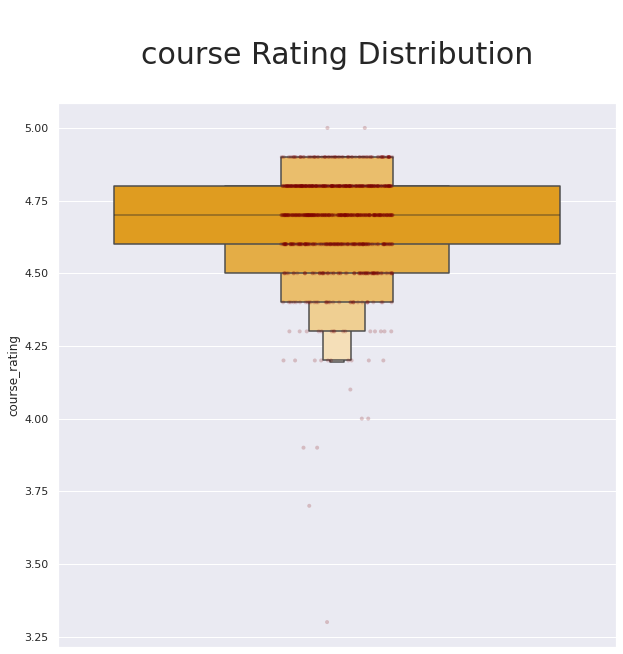

In [6]:
sns.set(rc={'figure.figsize':(10,10)})
ax = sns.boxenplot( y="course_rating", data=df,
                   showfliers=False,color='orange')
ax = sns.stripplot( y="course_rating", data=df,
                   size=4, color="maroon",alpha=0.2)
ax.axes.set_title("\ncourse Rating Distribution\n",fontsize=30)

### Ploting course_rating to get a overview of the distribution.

Text(0.5, 1.0, '\ncourse Rating Distribution\n')

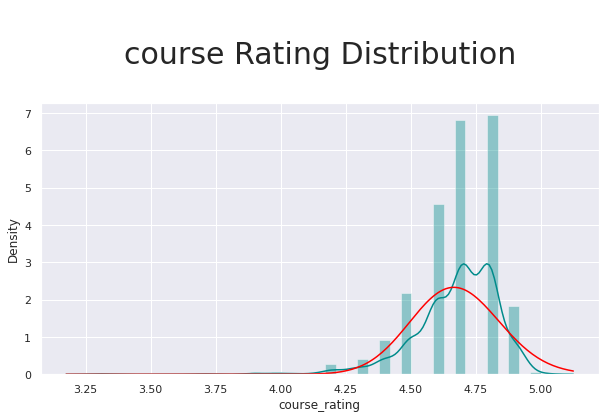

In [7]:
sns.set(rc={'figure.figsize':(10,5)})
p=sns.distplot(df['course_rating'],color='darkcyan',fit_kws={"color":"red"},fit=stats.gamma, label="label 1")
p.axes.set_title("\ncourse Rating Distribution\n",fontsize=30)

#### Findings:
Average course rating is quite higher, compared to lowest and maximum value.

Rating distribution per course difficulty :

## 5.2. Frequency based on difficulty.

Text(0.5, 1.0, '\nFrequency Distribution based on difficulty\n')

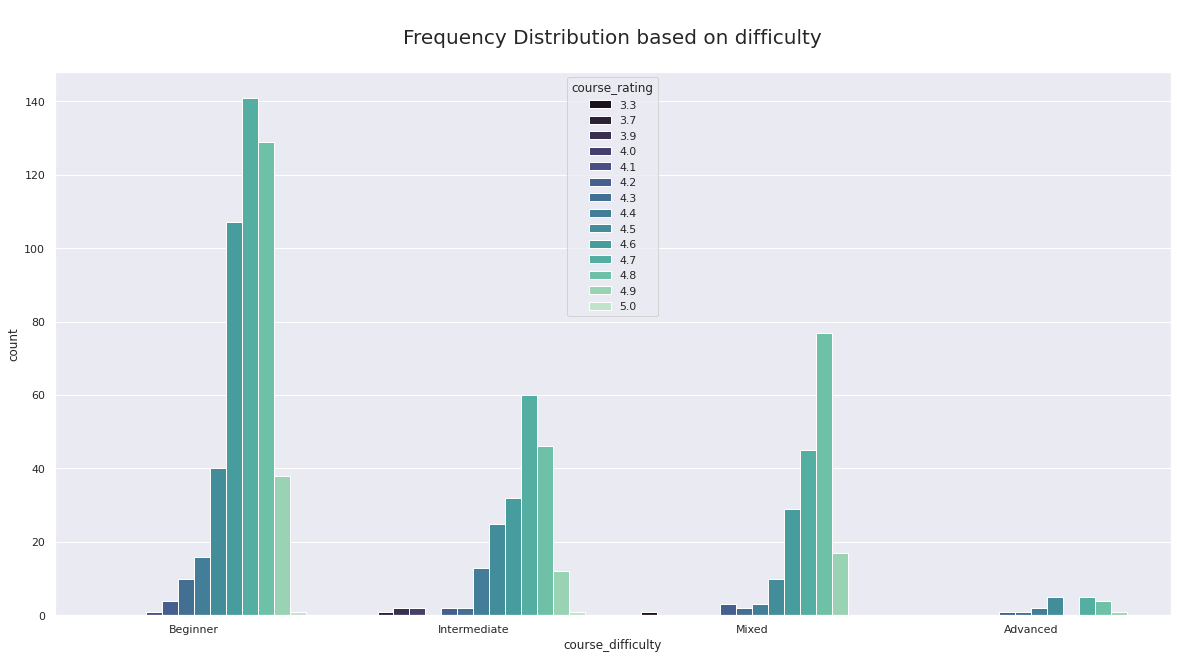

In [8]:
sns.set(rc={'figure.figsize':(20,10)})
ax = sns.countplot(hue="course_rating", x="course_difficulty", data=df,palette="mako")
ax.axes.set_title("\nFrequency Distribution based on difficulty\n",fontsize=20)

#### Insight: 
Advanced courses' rating has some ups-and downs; maybe due to low frequency.<br>
Beginner course has distribution quite similiar to total rating chart.<br>
Intermidiate course's rating top is not as sharp of others, that may say - as the participants has some knowledge on the topic, they can judge better and being critical.


## 5.3. Rating distribution per course type :

Text(0.5, 1.0, '\nRating distribution per course type\n')

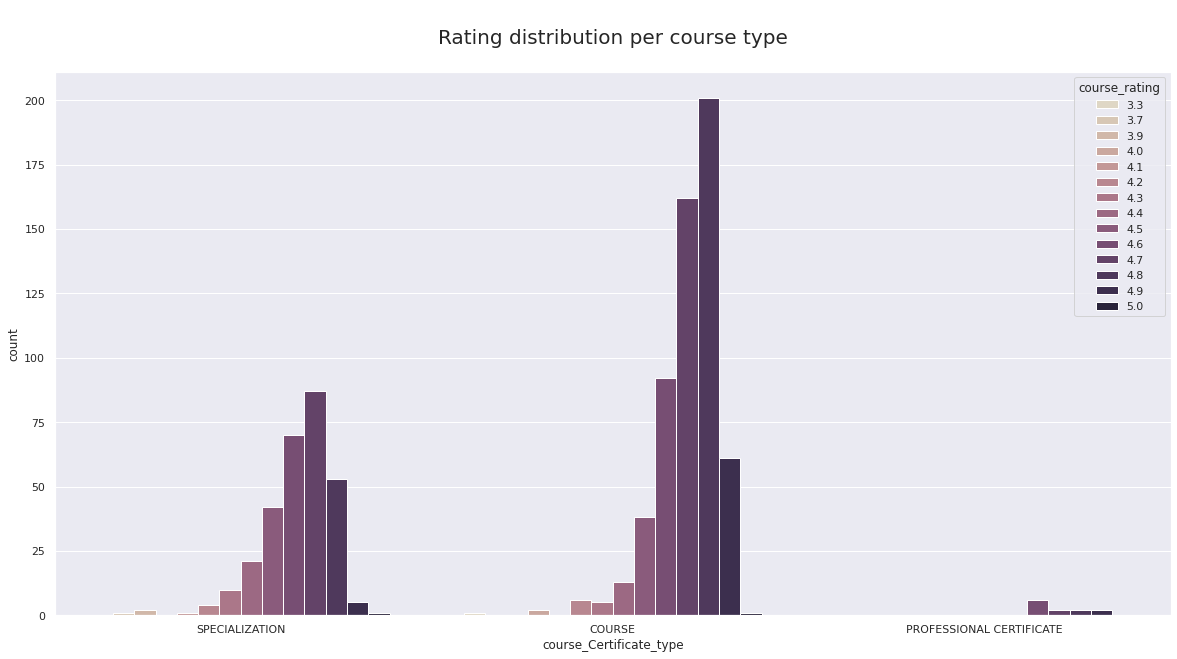

In [9]:
sns.set(rc={'figure.figsize':(20,10)})
ax = sns.countplot(hue="course_rating", x="course_Certificate_type", data=df,palette="ch:s=-.2,r=.6")
ax.axes.set_title("\nRating distribution per course type\n",fontsize=20)

#### Findings and Insight:
1. Specializations has lower mean value than courses, but the distribution is interesting. specialization has good distribution values on right, but normal courses are on left.

## 5.4. Rating distribution per course type : Combined

Text(0.5, 1.0, '\nRating distribution per course type : Combined\n')

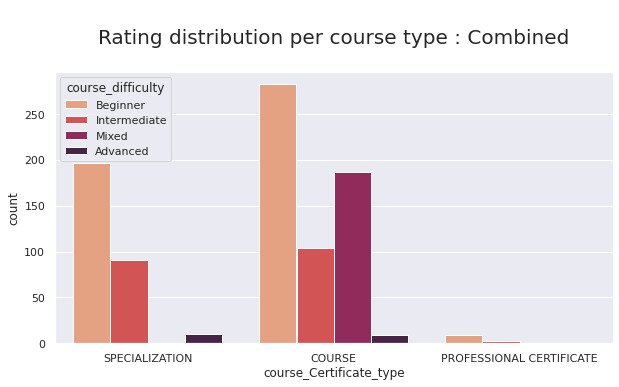

In [10]:
sns.set(rc={'figure.figsize':(10,5)})
ax = sns.countplot(hue="course_difficulty", x="course_Certificate_type", data=df,palette="rocket_r")
ax.axes.set_title("\nRating distribution per course type : Combined\n",fontsize=20)

#### Findings:
Mixed - Course has a unstable distribution, othes have normal distribution.

## 5.5. Analyzing course Certificate types values.

Text(0.5, 1.0, '\nDistribution per course type \n')

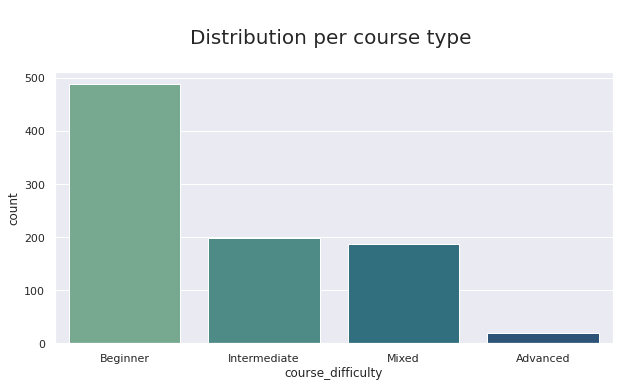

In [11]:
sns.set(rc={'figure.figsize':(10,5)})
ax = sns.countplot( x="course_difficulty", data=df,palette="crest")
ax.axes.set_title("\nDistribution per course type \n",fontsize=20)

Text(0.5, 1.0, '\nRating distribution per course certification type : Combined\n')

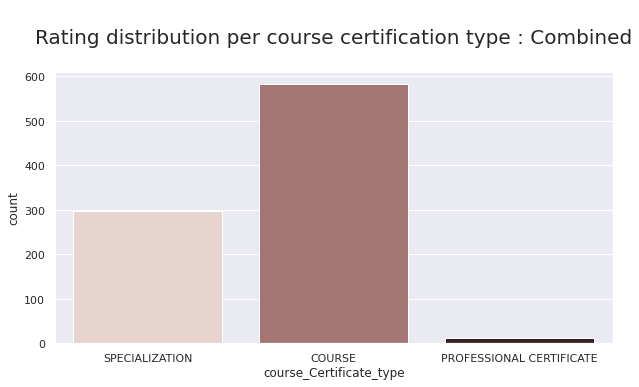

In [12]:
sns.set(rc={'figure.figsize':(10,5)})
ax = sns.countplot( x="course_Certificate_type", data=df,palette="ch:s=.8,r=.1")
ax.axes.set_title("\nRating distribution per course certification type : Combined\n",fontsize=20)

#### Findings:
Course Counts:
- *Beginner > Intermidiate > Advanced*. Not enough data for advanced courses.
- *Courses > Specialization > Professional certificate.* Not enough data for Professional certificates.

<div style="padding:20px;color:white;margin:0;font-size:220%;text-align:center;display:fill;border-radius:5px;background-color:#282f85;overflow:hidden;font-weight:500">Data Wrangling</div>

# 📄 6. Data Wrangling

## Data Cleaning
1. Deleting first Unnamed column
2. Deleting course name - not necessary now; as all the values are unique
3. Others will be done as necessary.

<div style="padding:20px;color:white;margin:0;font-size:220%;text-align:center;display:fill;border-radius:5px;background-color:#282f85;overflow:hidden;font-weight:500">Feature Engineering</div>

# ⌛️ 7. Feature Engineering

## 7.1. Modifying course_students_enrolled column

In [13]:
df_fe1=df.copy()

In [14]:
def course_students_enrolled_modifier(x):
    return x[:-2]

In [15]:
df_fe1['course_students_enrolled_modified']=df_fe1['course_students_enrolled'].apply(course_students_enrolled_modifier)
df_fe1['course_students_enrolled_modified']=df_fe1['course_students_enrolled_modified'].apply(pd.to_numeric)
df_fe1 =df_fe1.drop(['course_students_enrolled'],axis=1)
df_fe1

,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled_modified
0,(ISC)² Systems Security Certified Practitioner...,(ISC)²,SPECIALIZATION,4.7,Beginner,5.0
1,A Crash Course in Causality: Inferring Causal...,University of Pennsylvania,COURSE,4.7,Intermediate,1.0
2,A Crash Course in Data Science,Johns Hopkins University,COURSE,4.5,Mixed,13.0
3,A Law Student's Toolkit,Yale University,COURSE,4.7,Mixed,9.0
4,A Life of Happiness and Fulfillment,Indian School of Business,COURSE,4.8,Mixed,32.0
...,...,...,...,...,...,...
886,Программирование на Python,Mail.Ru Group,SPECIALIZATION,4.5,Intermediate,5.0
887,Психолингвистика (Psycholinguistics),Saint Petersburg State University,COURSE,4.8,Mixed,2.0
888,Разработка интерфейсов: вёрстка и JavaScript,E-Learning Development Fund,SPECIALIZATION,4.5,Intermediate,3.0
889,Русский как иностранный,Saint Petersburg State University,SPECIALIZATION,4.6,Intermediate,9.0


## 7.2. Modifying course_difficulty column to numarical

In [16]:
def course_difficulty_modifier(x):
    if x=="Beginner":
        return "0"
    elif x=="Intermediate":
        return "1"
    elif x=="Mixed":
        return "0.5"
    elif x=="Advanced":
        return "2"
    else:
        return "0" 
"""as most courses are beginner level, we are assuming undefined will be beginner too."""

'as most courses are beginner level, we are assuming undefined will be beginner too.'

In [17]:
df_fe1['course_difficulty_modified']=df_fe1['course_difficulty'].apply(course_difficulty_modifier)
df_fe1['course_difficulty_modified']=df_fe1['course_difficulty_modified'].apply(pd.to_numeric)
df_fe1 =df_fe1.drop(['course_difficulty'],axis=1)
df_fe1

,course_title,course_organization,course_Certificate_type,course_rating,course_students_enrolled_modified,course_difficulty_modified
0,(ISC)² Systems Security Certified Practitioner...,(ISC)²,SPECIALIZATION,4.7,5.0,0.0
1,A Crash Course in Causality: Inferring Causal...,University of Pennsylvania,COURSE,4.7,1.0,1.0
2,A Crash Course in Data Science,Johns Hopkins University,COURSE,4.5,13.0,0.5
3,A Law Student's Toolkit,Yale University,COURSE,4.7,9.0,0.5
4,A Life of Happiness and Fulfillment,Indian School of Business,COURSE,4.8,32.0,0.5
...,...,...,...,...,...,...
886,Программирование на Python,Mail.Ru Group,SPECIALIZATION,4.5,5.0,1.0
887,Психолингвистика (Psycholinguistics),Saint Petersburg State University,COURSE,4.8,2.0,0.5
888,Разработка интерфейсов: вёрстка и JavaScript,E-Learning Development Fund,SPECIALIZATION,4.5,3.0,1.0
889,Русский как иностранный,Saint Petersburg State University,SPECIALIZATION,4.6,9.0,1.0


<div style="padding:20px;color:white;margin:0;font-size:220%;text-align:center;display:fill;border-radius:5px;background-color:#282f85;overflow:hidden;font-weight:500">More EDA</div>

# 🔍 8. More EDA

## 8.1. Data Exploration of newly engineered columns

In [18]:
df_fe1[['course_difficulty_modified','course_students_enrolled_modified']].describe()

,course_difficulty_modified,course_students_enrolled_modified
count,891.000000,881.000000
mean,0.369809,8.511918
std,0.472738,10.731756
min,0.000000,1.000000
25%,0.000000,2.000000
50%,0.000000,5.000000
75%,0.500000,9.000000
max,2.000000,83.000000


course_students_enrolled_modified has some empty columns, so we have to fill them. 

Text(0.5, 1.0, '\n Course_students_enrolled Distribution\n')

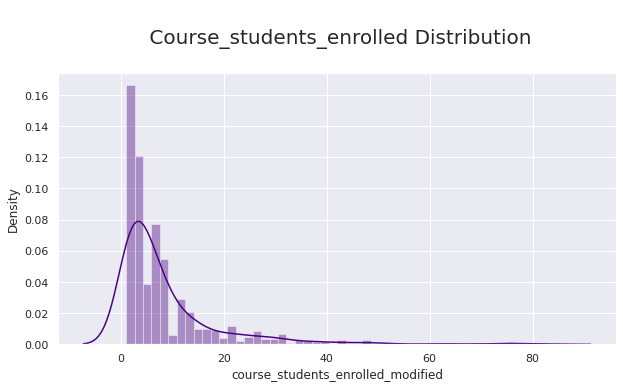

In [19]:
sns.set(rc={'figure.figsize':(10,5)})
p=sns.distplot(df_fe1['course_students_enrolled_modified'],color='indigo')
p.axes.set_title("\n Course_students_enrolled Distribution\n",fontsize=20)

so , most of the frequencies are in between 0-10, so, using average-1; so avoid the effect of outliers.

In [20]:
df_fe1['course_students_enrolled_modified'].fillna((df_fe1['course_students_enrolled_modified'].mean()-1), inplace=True)
df_fe1[['course_difficulty_modified','course_students_enrolled_modified']].describe()

,course_difficulty_modified,course_students_enrolled_modified
count,891.000000,891.000000
mean,0.369809,8.500695
std,0.472738,10.671816
min,0.000000,1.000000
25%,0.000000,2.000000
50%,0.000000,5.000000
75%,0.500000,9.000000
max,2.000000,83.000000


In [21]:
df_numaric=df_fe1.select_dtypes(include=np.number)

<div style="padding:20px;color:white;margin:0;font-size:220%;text-align:center;display:fill;border-radius:5px;background-color:#282f85;overflow:hidden;font-weight:500">Corelation Analysis</div>

# 🛠 9. Corelation Analysis
## 9.1. Finding relation between columns

In [22]:
corrM = df_numaric.corr()
corrM

,course_rating,course_students_enrolled_modified,course_difficulty_modified
course_rating,1.000000,0.015939,-0.089810
course_students_enrolled_modified,0.015939,1.000000,-0.011343
course_difficulty_modified,-0.089810,-0.011343,1.000000


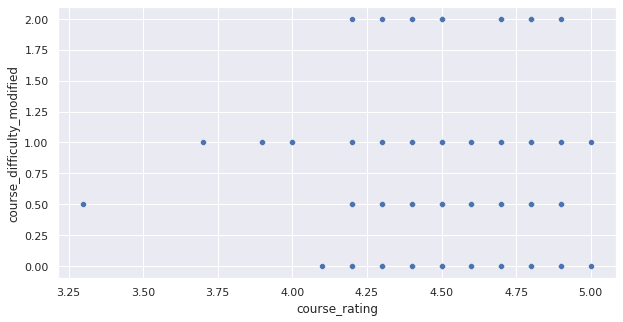

In [23]:
sns.set(rc={'figure.figsize':(10,5)})
ax = sns.scatterplot( x='course_rating', y='course_difficulty_modified', data=df_numaric,palette="crest")

#### Findings : 
No effective coorelation.

## 9.2. University wise analysis

course_organization with more than 10 courses - students enrolled (k)

In [24]:
g_uni=df_fe1.groupby("course_organization")["course_students_enrolled_modified",'course_rating'].agg({"course_students_enrolled_modified":'size',"course_students_enrolled_modified":'mean','course_rating':'mean'}).reset_index()

In [25]:
g_uni_2=df_fe1.groupby("course_organization")["course_students_enrolled_modified"].agg({'size'}).reset_index()
g_uni['size']=g_uni_2['size']
g_uni_final=g_uni[g_uni_2['size']> 10]
g_uni_final.sort_values(by=["course_students_enrolled_modified","course_rating"],ascending=False);

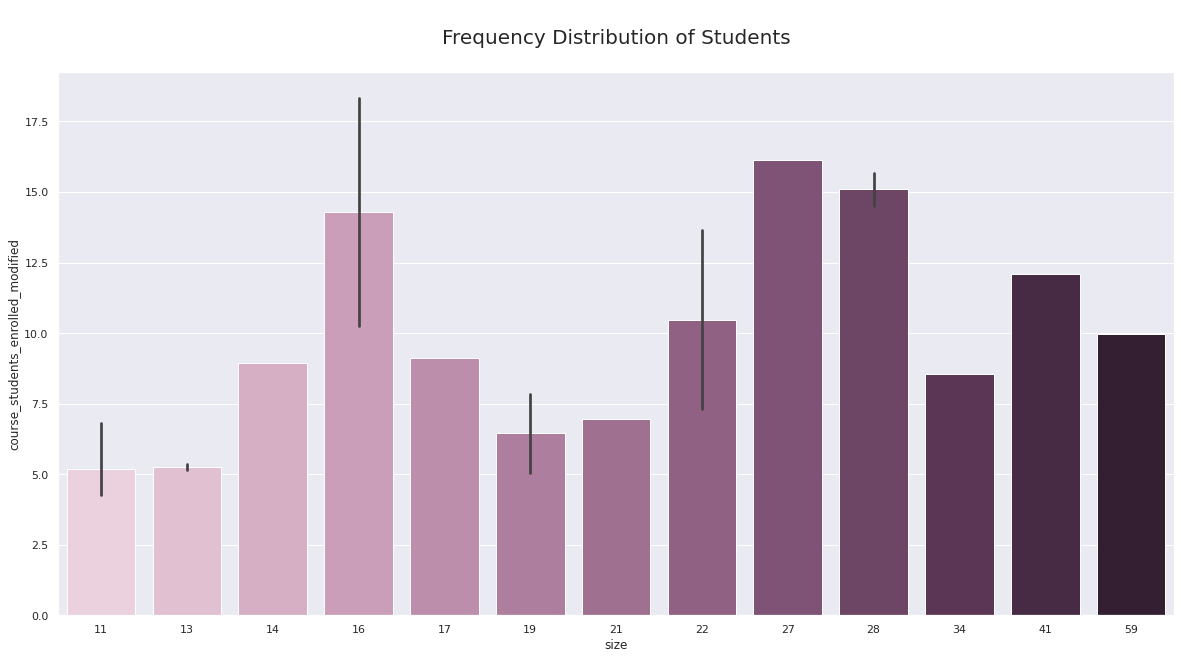

In [26]:
sns.set(rc={'figure.figsize':(20,10)})
ax = sns.barplot(x="size", y="course_students_enrolled_modified", data=g_uni_final,palette="ch:s=.4,r=.1")
ax.axes.set_title("\nFrequency Distribution of Students\n",fontsize=20);

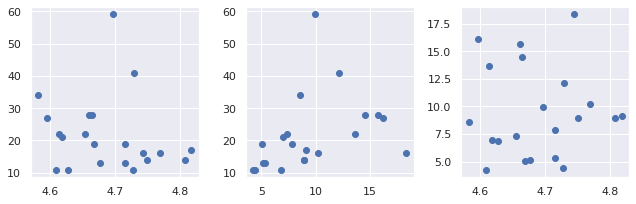

In [27]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(9, 3))
axes[0].scatter(g_uni_final["course_rating"], g_uni_final['size'])
axes[1].scatter(g_uni_final["course_students_enrolled_modified"], g_uni_final['size'])
axes[2].scatter(g_uni_final["course_rating"], g_uni_final["course_students_enrolled_modified"])
fig.tight_layout()
plt.show()

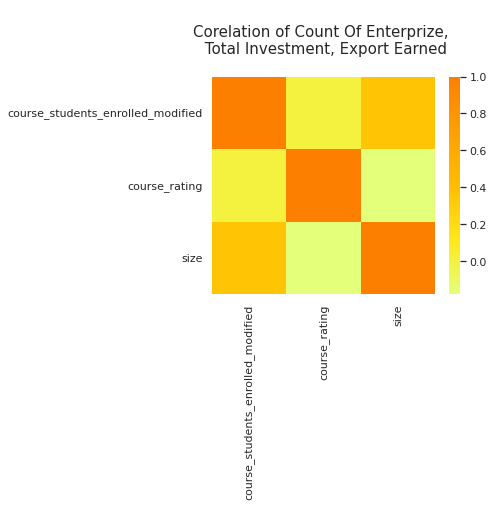

In [28]:
corrM = g_uni_final.corr()
sns.set(rc={'figure.figsize':(5,4)})
p=sns.heatmap(corrM, 
        xticklabels=corrM.columns,
        yticklabels=corrM.columns,
        cmap="Wistia")
p=p.axes.set_title("\nCorelation of Count Of Enterprize, \n Total Investment, Export Earned\n",fontsize=15)

#### Findings
1. Mean number of students enrolled per university has some positive corelation to number of courses offered by the university. The more courses are offered, the more students are enroled in average.

<div style="padding:20px;color:white;margin:0;font-size:220%;text-align:center;display:fill;border-radius:5px;background-color:#282f85;overflow:hidden;font-weight:500">Top Rated Course Provider</div>

# 📕 10. Top Rated Course Provider

In [29]:
df['course_title']=df['course_title']

In [30]:
g_uni['overall_rating']=(g_uni['course_students_enrolled_modified']/g_uni['course_students_enrolled_modified'].max())*3+(g_uni['course_rating']/g_uni['course_rating'].max())*7
g_uni=g_uni.sort_values(by='overall_rating',ascending=False)

In [31]:
g_uni.overall_rating.describe().T

count    154.000000
mean       7.502501
std        0.647127
min        6.403727
25%        7.118012
50%        7.317288
75%        7.886720
max        9.857143
Name: overall_rating, dtype: float64

In [32]:
g_unix=g_uni[g_uni['overall_rating']>=8.5]
g_unix

,course_organization,course_students_enrolled_modified,course_rating,size,overall_rating
58,McMaster University,23.000000,4.800000,1,9.857143
33,Google - Spectrum Sharing,21.000000,4.900000,1,9.739130
151,École Polytechnique,19.000000,4.800000,1,9.335404
52,Ludwig-Maximilians-Universität München (LMU),19.000000,4.750000,2,9.263975
150,deeplearning.ai,18.344495,4.743750,16,9.169546
30,Georgia Institute of Technology,17.700000,4.660000,10,8.965839
142,University of Washington,16.600000,4.660000,5,8.822360
48,Johns Hopkins University,15.678571,4.660714,28,8.703194
123,"University of California, Irvine",16.148148,4.596296,27,8.672418
79,SAS,13.666667,4.766667,3,8.592133


Text(0.5, 1.0, '\nBest course providers\n\n')

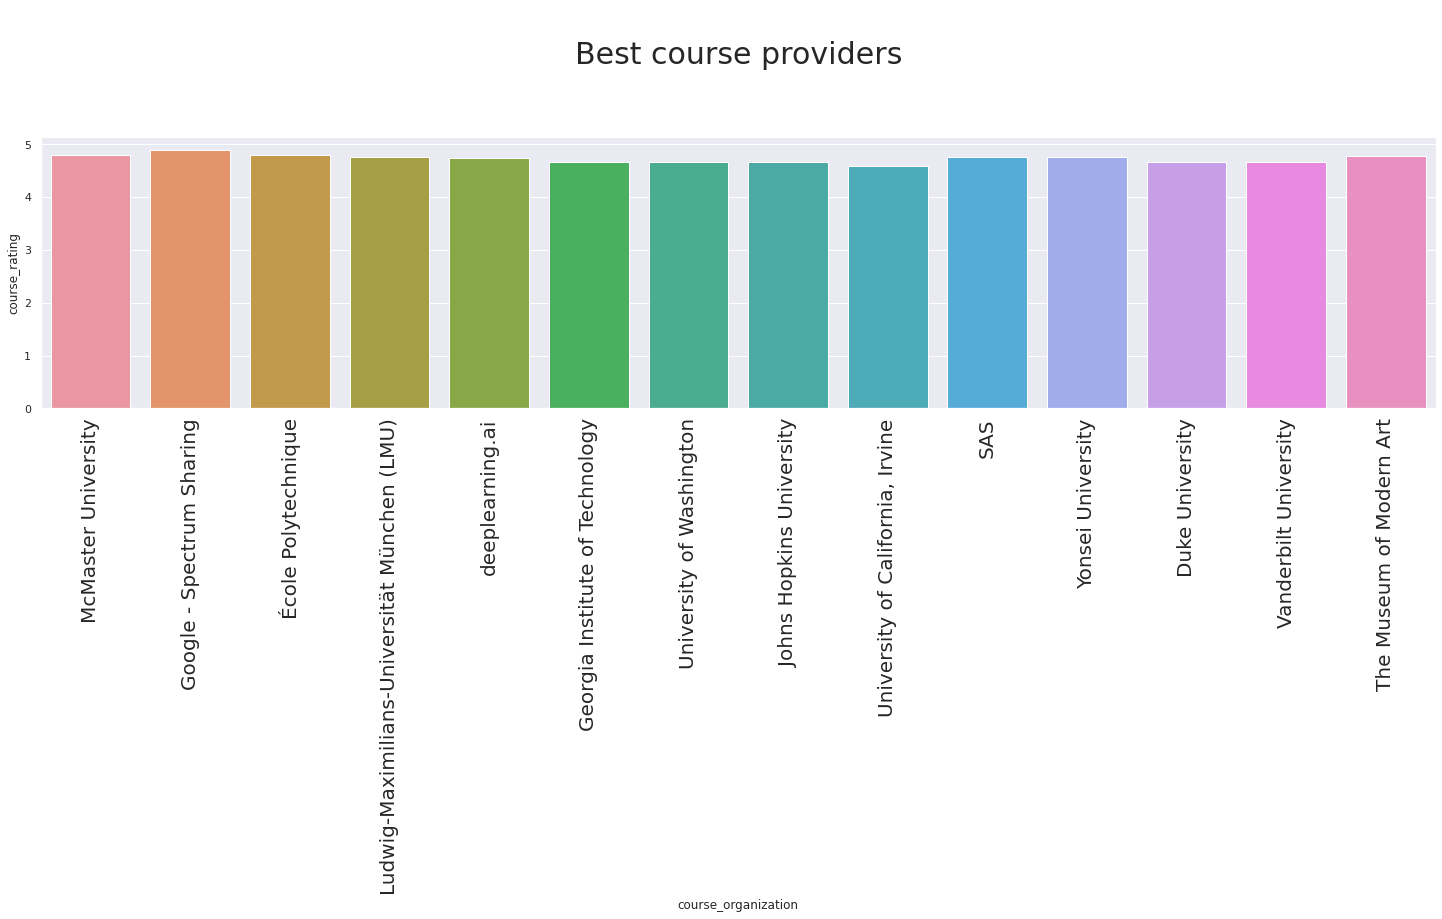

In [33]:
sns.set(rc={'figure.figsize':(25,5)})
plt.xticks(fontsize=20,rotation='vertical')
p=sns.barplot(x='course_organization',y="course_rating",data=g_unix,hue_order=g_uni['overall_rating'])
p.axes.set_title("\nBest course providers\n\n",fontsize=30)

<div style="padding:20px;color:white;margin:0;font-size:220%;text-align:center;display:fill;border-radius:5px;background-color:#282f85;overflow:hidden;font-weight:500">Reviews Sentiment Analysis</div>

# 📑 11. Reviews Sentiment Analysis

## 11.1. Importing reviews

In [34]:
r=pd.read_csv('/kaggle/input/course-reviews-on-coursera/Coursera_reviews.csv')
r.head()

,reviews,reviewers,date_reviews,rating,course_id
0,"Pretty dry, but I was able to pass with just t...",By Robert S,"Feb 12, 2020",4,google-cbrs-cpi-training
1,would be a better experience if the video and ...,By Gabriel E R,"Sep 28, 2020",4,google-cbrs-cpi-training
2,Information was perfect! The program itself wa...,By Jacob D,"Apr 08, 2020",4,google-cbrs-cpi-training
3,A few grammatical mistakes on test made me do ...,By Dale B,"Feb 24, 2020",4,google-cbrs-cpi-training
4,Excellent course and the training provided was...,By Sean G,"Jun 18, 2020",4,google-cbrs-cpi-training


## 11.2. Importing Necessary Modules

In [35]:
!pip install vaderSentiment

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 KB 306.9 kB/s eta 0:00:00


In [36]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image
import nltk  
nltk.download('stopwords') 
from nltk.corpus import stopwords 
from nltk.stem.porter import PorterStemmer 
from collections import Counter
import cufflinks as cf
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


## 11.3. Generating Wordcloud

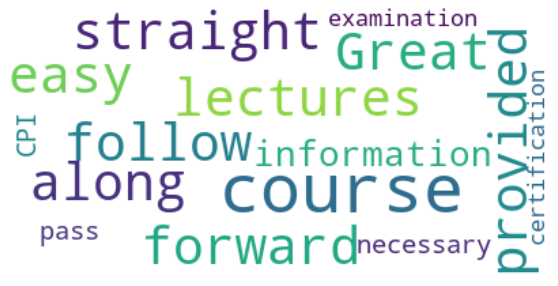

In [37]:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(r.reviews[10])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

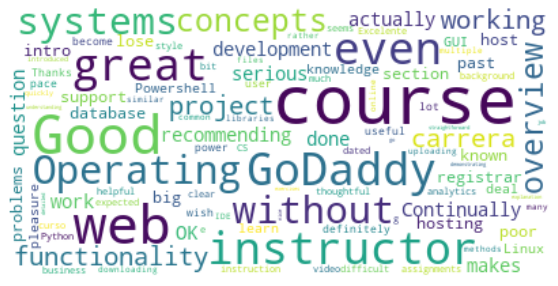

In [38]:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(' '.join(r.sample(10).reviews))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

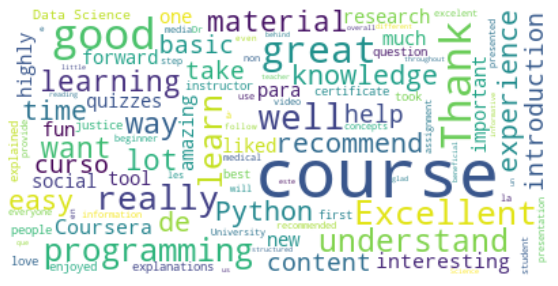

In [39]:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(' '.join(r.sample(100).reviews))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## 11.4. Generating Review Sentiments using Vader Sentiment

In [40]:
def sentiment_analyzer_scores(sentence):
    score = analyser.polarity_scores(sentence)
    return score

In [41]:
neg=[]
neu=[]
pos=[]
comp=[]
for review in r.reviews:
    scores=sentiment_analyzer_scores(str(review))
    neg.append(scores['neg'])
    pos.append(scores['pos'])
    neu.append(scores['neu'])
    comp.append(scores['compound'])

<div style="padding:20px;color:white;margin:0;font-size:220%;text-align:center;display:fill;border-radius:5px;background-color:#282f85;overflow:hidden;font-weight:500">Reviews Analysis</div>

# 📒 12. Reviews Analysis

In [42]:
r['s_pos']=pos
r['s_neu']=neu
r['s_neg']=neg
r['s_comp']=comp

## 12.1. Sentiment Distribution

Text(0.5, 1.0, 'Positive Reviews')

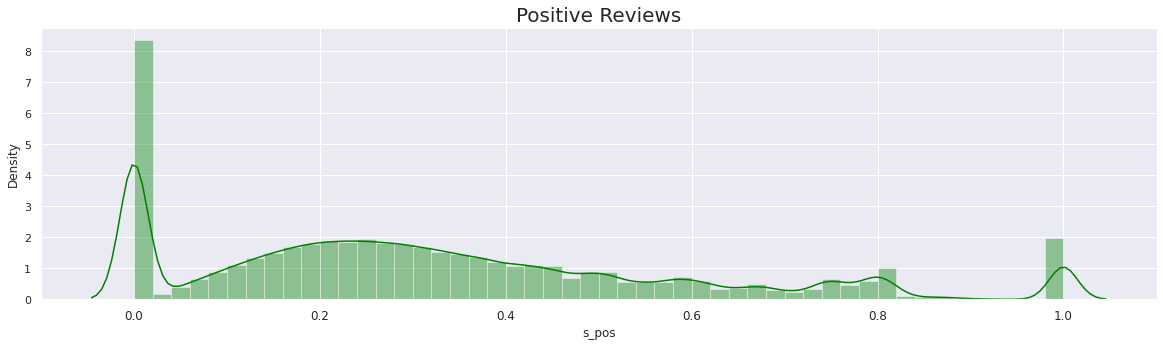

In [43]:
sns.set(rc={'figure.figsize':(20,5)})
plt.xticks(fontsize=12)
p=sns.distplot(r['s_pos'],color='green')
p.axes.set_title("Positive Reviews",fontsize=20)

Text(0.5, 1.0, 'Negative Reviews')

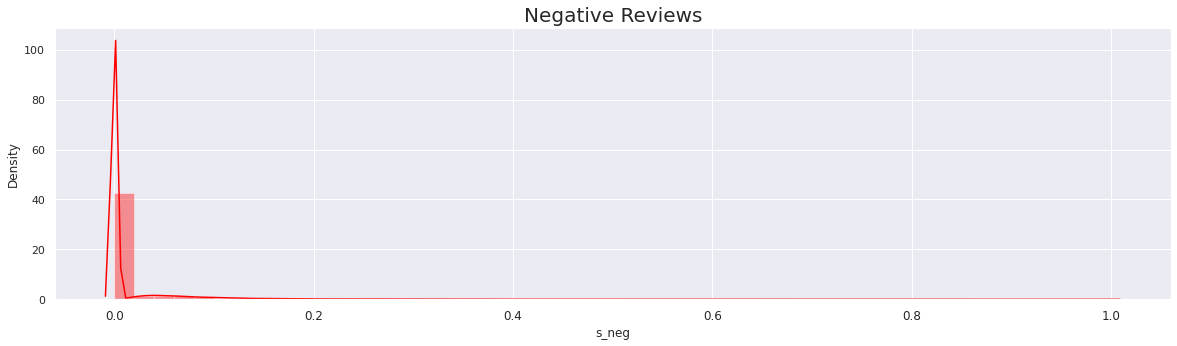

In [44]:
sns.set(rc={'figure.figsize':(20,5)})
plt.xticks(fontsize=12)
p=sns.distplot(r['s_neg'],color='red')
p.axes.set_title("Negative Reviews",fontsize=20)

Text(0.5, 1.0, 'Neutral Reviews')

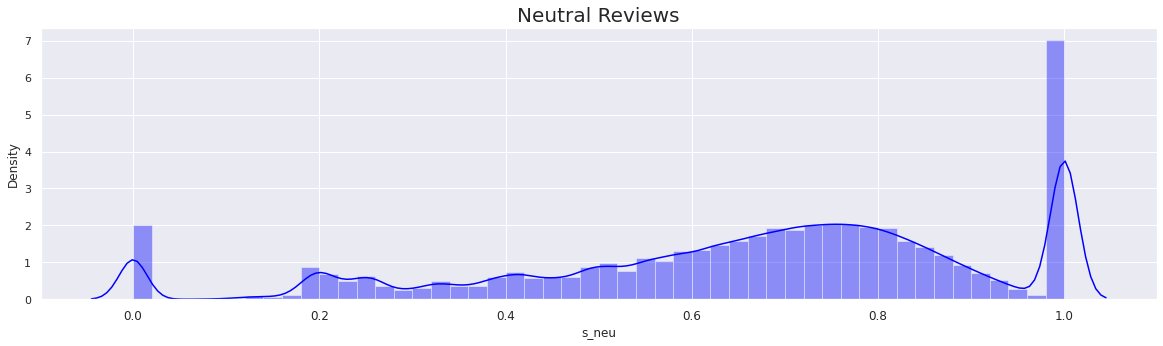

In [45]:
sns.set(rc={'figure.figsize':(20,5)})
plt.xticks(fontsize=12)
p=sns.distplot(r['s_neu'],color='blue')
p.axes.set_title("Neutral Reviews",fontsize=20)

Text(0.5, 1.0, 'Neutral Reviews')

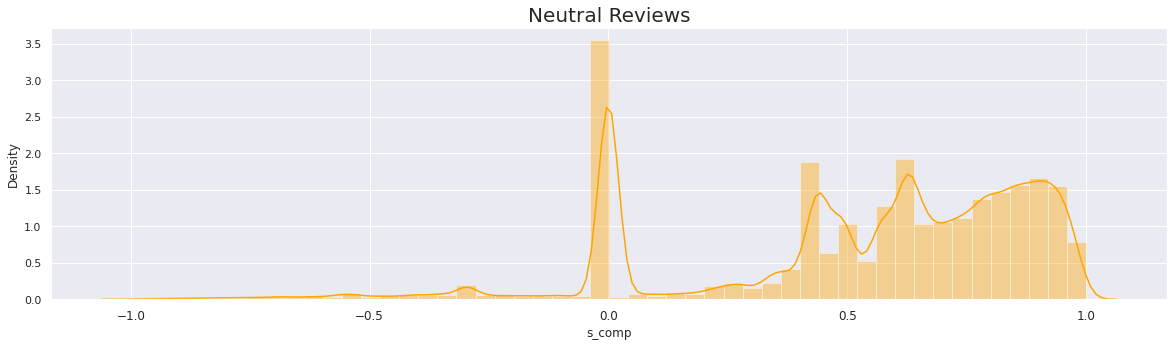

In [46]:
sns.set(rc={'figure.figsize':(20,5)})
plt.xticks(fontsize=12)
p=sns.distplot(r['s_comp'],color='orange')
p.axes.set_title("Neutral Reviews",fontsize=20)

## 12.2 Course wise analysis (Giv3en Rating and Sentiment)

In [47]:
course_wise = r.groupby('course_id')['s_comp','rating'].mean()

In [48]:
course_wise['s_comp']=((course_wise['s_comp']*10)+10)/4
course_wise

,s_comp,rating
course_id,,
aboriginal-education,4.116898,4.604061
access-control-sscp,3.568584,4.572519
accounting-analytics,3.804213,4.426991
accounting-data-analytics-python,3.751625,3.500000
actualizacion-manejo-diabetes-tipo-2,2.417052,4.867052
...,...,...
womens-health-human-rights,4.141009,4.894231
write-a-feature-length-screenplay-for-film-or-television,4.090939,4.666667
write-your-first-novel,3.717000,3.942308


Text(0.5, 1.0, 'Course wise Actual and Sentiment Scores')

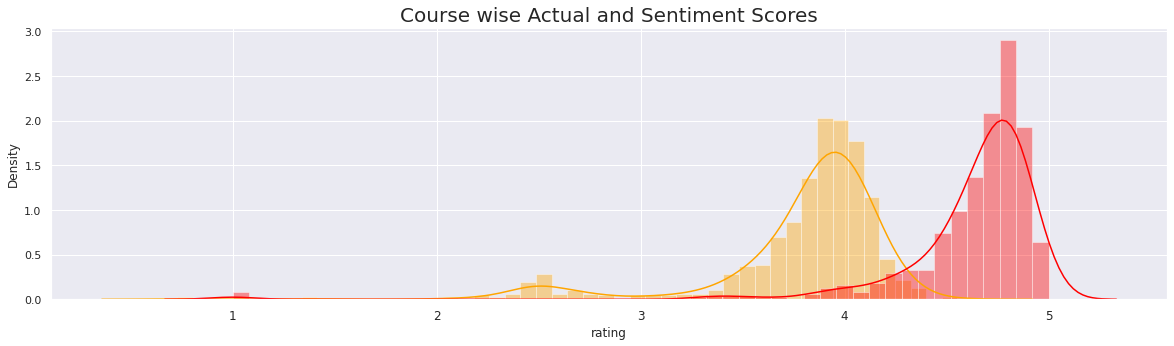

In [49]:
sns.set(rc={'figure.figsize':(20,5)})
plt.xticks(fontsize=12)
p=sns.distplot(course_wise['s_comp'],color='orange')
p=sns.distplot(course_wise['rating'],color='red')
p.axes.set_title("Course wise Actual and Sentiment Scores",fontsize=20)

### Observations
- Overall given rating is higher than sentiment scores.

## 12.3. Co-relation

Text(0.5, 1.0, 'Given rating and sentiment rating co-relation')

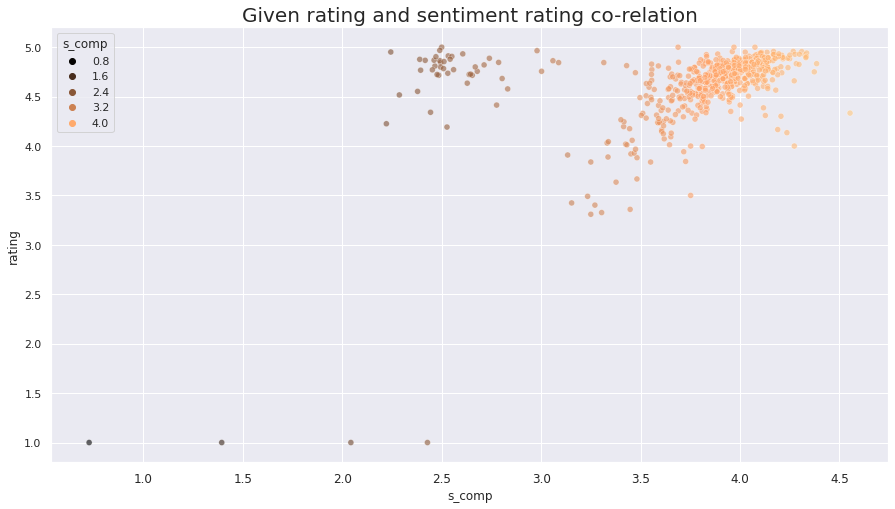

In [50]:
sns.set(rc={'figure.figsize':(15,8)})
plt.xticks(fontsize=12)
p=sns.scatterplot(data=course_wise,x='s_comp',y='rating',palette='copper',hue='s_comp',alpha=0.6)
p.axes.set_title("Given rating and sentiment rating co-relation",fontsize=20)

### Observations
- No visible c-relation; but 3 clusters!!! Interesting.
- The dark cluster contaiins tthe difference between gven rating and review sentiment rating.

<div style="padding:20px;color:white;margin:0;font-size:220%;text-align:center;display:fill;border-radius:5px;background-color:#282f85;overflow:hidden;font-weight:500">Key Findings and Insights</div>

# 📒 13. Key Findings and Insights

1. Average course rating is quite higher, compared to lowest and maximum value. So, the cours quality is being maintained.
2. Advanced courses' rating has some ups-and downs; maybe due to low frequency.
3. Beginner course has distribution quite similiar to total rating chart, as big portion of the data is from them, and he number of beginner level courses are high.
4. Intermidiate course's rating top is not as sharp of others, that may say - as the participants has some knowledge on the topic, they can judge better and being critical.
5. Specializations has lower mean value than courses, but the distribution is interesting. specialization has good distribution values on right, but normal courses are on left.
6. No effective coorelation between course_difficulty,course_students_enrolled, course rating.
7. No effective coorelation between course_students_enrolled, course rating per university.
8. Mean number of students enrolled per university has some positive corelation to number of courses offered by the university. The more courses are offered, the more students are enroled in average.

<div style="padding:150px;color:white;margin:150;font-size:400%;text-align:center;display:fill;border-radius:5px;background-color:#282c5c;overflow:hidden;font-weight:800">Upvote, Comment, Share</div>